In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# Open the ROOT file
file = uproot.open("events.root")
tree = file["Delphes;1"]

In [3]:
# Define the dictionary based on the table in the image
particles_map = {
    1: "d",
    2: "u",
    3: "s",
    4: "c",
    5: "b",
    6: "t",
    7: "b'",
    8: "t'",
    11: "e−",
    12: "νₑ",
    13: "μ−",
    14: "ν_μ",
    15: "τ−",
    16: "ν_τ",
    17: "τ′−",
    18: "ν_τ′",
    21: "g",
    22: "γ",
    23: "Z⁰",
    24: "W⁺",
    25: "h⁰/H⁰₁",
    32: "Z′/Z⁰₂",
    33: "Z″/Z⁰₃",
    34: "W′/W⁺₂",
    35: "H⁰/H⁰₂",
    36: "A⁰/H⁰₃",
    37: "H⁺",
    1103: "(dd)₁",
    2101: "(ud)₀",
    2103: "(ud)₁",
    2203: "(uu)₁",
    3101: "(sd)₀",
    3103: "(sd)₁",
    3201: "(su)₀",
    3203: "(su)₁",
    3303: "(ss)₁",
    4101: "(cd)₀",
    4103: "(cd)₁",
    4201: "(cu)₀",
    4203: "(cu)₁",
    4301: "(cs)₀",
    4303: "(cs)₁",
    4403: "(cc)₁",
    5101: "(bd)₀",
    5103: "(bd)₁",
    5201: "(bu)₀",
    5203: "(bu)₁",
    5301: "(bs)₀",
    5303: "(bs)₁",
    5401: "(bc)₀",
    5403: "(bc)₁",
    5503: "(bb)₁",
    3000111: "π⁰_tech",
    3000211: "π⁺_tech",
    3000221: "π′⁰_tech",
    3100221: "η₀_tech",
    3000113: "ρ⁰_tech",
    3000213: "ρ⁺_tech",
    3000223: "ω⁰_tech",
    3100021: "V₈",
    3060111: "π¹_tech,22",
    3160111: "π⁸_tech,22",
    3130113: "ρ_tech,11",
    3140113: "ρ_tech,12",
    3150113: "ρ_tech,21",
    3160113: "ρ_tech,22",
    4000001: "d*",
    4000002: "u*",
    4000011: "e*",
    4000012: "ν*ₑ",
    1000993: "R0gg",
    1009113: "R00",
    1009213: "R+_udd",
    1009223: "R0g_uud",
    1009313: "R0g_us",
    1009323: "R+_gus",
    1009333: "R0g_ss",
    1091114: "R0dddd",
    1092114: "R0d_ddd",
    1092214: "R+_uudd",
    1092224: "R+++_uuu",
    1093114: "R0g_sdd",
    1093214: "R0g_sud",
    1093224: "R+_gsuu",
    1093314: "R0g_ssd",
    1093324: "R-_gssu",
    1093334: "R0g_sss",
    1000622: "R+_t1_d",
    1000632: "R+_t1_u",
    1000642: "R0_t1_s",
    1000652: "R+_t1_b",
    1006113: "R0_t1_dd1",
    1006211: "R+_t1_udo",
    1006213: "R+t1_udu1",
    1006223: "R+_t1_uuu",
    1006311: "R0_t1_sd0",
    1006313: "R0_t1_sd1",
    1006321: "R+_t1_su0",
    1006323: "R+t1_su1",
    1006333: "R0_t1_ss1",
    1000001: "d~L",
    1000002: "u~L",
    1000003: "s~L",
    1000004: "c~L",
    1000005: "b~1",
    1000006: "t~1",
    1000011: "e~L",
    1000012: "ve~L",
    1000013: "u~L",
    1000014: "v~mL",
    1000015: "T~1",
    1000016: "v~T L",
    2000001: "d~R",
    2000002: "u~R",
    2000003: "s~R",
    2000004: "c~R",
    2000005: "b2",
    2000006: "t2",
    2000011: "e~R",
    2000013: "u~R",
    2000015: "T2",
    1000021: "g~",
    1000022: "x~0 1",
    1000023: "x~0 2",
    1000024: "x~1",
    1000025: "x~0 3",
    1000035: "x~0 4",
    1000037: "x~2",
    1000039: "G",
    39: "G (graviton)",
    41: "R0",
    42: "LQe",
    110: "reggeon",
    990: "pomeron",
    9990: "odderon",
    111: "π0",
    211: "π+",
    9000111: "a0(980)0",
    9000211: "a0(980)+",
    100111: "π(1300)0",
    100211: "π(1300)+",
    10111: "a0(1450)0",
    10211: "a0(1450)+",
    9010111: "π(1800)0",
    9010211: "π(1800)+",
    113: "ρ(770)0",
    213: "ρ(770)+",
    10113: "b1(1235)0",
    10213: "b1(1235)+",
    20113: "a1(1260)0",
    20213: "a1(1260)+",
    9000113: "π1(1400)0",
    9000213: "π1(1400)+",
    100113: "ρ(1450)0",
    100213: "ρ(1450)+",
    9010113: "π1(1600)0",
    9010213: "π1(1600)+",
    9020113: "a1(1640)0",
    9020213: "a1(1640)+",
    30113: "ρ(1700)0",
    30213: "ρ(1700)+",
    9030113: "ρ(1900)0",
    9030213: "ρ(1900)+",
    9040113: "ρ(2150)0",
    9040213: "ρ(2150)+",
    115: "a2(1320)0",
    215: "a2(1320)+",
    10115: "π2(1670)0",
    10215: "π2(1670)+",
    9000115: "a2(1700)0",
    9000215: "a2(1700)+",
    9010115: "π2(2100)0",
    9010215: "π2(2100)+",
    117: "ρ3(1690)0",
    217: "ρ3(1690)+",
    9000117: "ρ3(1990)0",
    9000217: "ρ3(1990)+",
    9010117: "ρ3(2250)0",
    9010217: "ρ3(2250)+",
    119: "a4(2040)0",
    219: "a4(2040)+",
    221: "η",
    331: "η'(958)",
    9000221: "f0(600)",
    9010221: "f0(980)",
    100221: "η(1295)",
    10221: "f0(1370)",
    9020221: "η(1405)",
    100331: "η(1475)",
    9030221: "f0(1500)",
    10331: "f0(1710)",
    9040221: "η(1760)",
    9050221: "f0(2020)",
    9060221: "f0(2100)",
    9070221: "f0(2200)",
    9080221: "η(2225)",
    223: "ω(782)",
    333: "φ(1020)",
    10223: "h1(1170)",
    20223: "f1(1285)",
    10333: "h1(1380)",
    20333: "f1(1420)",
    100223: "ω(1420)",
    9000223: "f1(1510)",
    9010223: "h1(1595)",
    30223: "ω(1650)",
    100333: "φ(1680)",
    225: "f2(1270)",
    9000225: "f2(1430)",
    335: "f2'(1525)",
    9010225: "f2(1565)",
    9020225: "f2(1640)",
    10225: "η2(1645)",
    9030225: "f2(1810)",
    10335: "η2(1870)",
    9040225: "f2(1910)",
    9050225: "f2(1950)",
    9060225: "f2(2010)",
    9070225: "f2(2150)",
    9080225: "f2(2300)",
    9090225: "f2(2340)",
    227: "ω3(1670)",
    337: "φ3(1850)",
    229: "f4(2050)",
    9000229: "f4(2220)",
    9010229: "f4(2300)",
    130: "K0L",
    310: "K0S",
    311: "K0",
    321: "K+",
    9000311: "K*(800)0",
    9000321: "K*(800)+",
    10311: "K0(1430)0",
    10321: "K0(1430)+",
    100311: "K0(1460)0",
    100321: "K0(1460)+",
    9010311: "K(1830)0",
    9010321: "K(1830)+",
    9020311: "K(1950)0",
    9020321: "K(1950)+",
    313: "K*(892)0",
    323: "K*(892)+",
    10313: "K1(1270)0",
    10323: "K1(1270)+",
    20313: "K1(1400)0",
    20323: "K1(1400)+",
    100313: "K*(1410)0",
    100323: "K*(1410)+",
    9000313: "K1(1650)0",
    9000323: "K1(1650)+",
    30313: "K*(1680)0",
    30323: "K*(1680)+",
    315: "K2*(1430)0",
    325: "K2*(1430)+",
    9000315: "K2(1580)0",
    9000325: "K2(1580)+",
    10315: "K2(1770)0",
    10325: "K2(1770)+",
    20315: "K2(1820)0",
    20325: "K2(1820)+",
    9010315: "K2*(1980)0",
    9010325: "K2*(1980)+",
    9020315: "K2(2250)0",
    9020325: "K2(2250)+",
    317: "K3*(1780)0",
    327: "K3*(1780)+",
    9010317: "K3(2320)0",
    9010327: "K3(2320)+",
    319: "K4*(2045)0",
    329: "K4*(2045)+",
    9000319: "K4(2500)0",
    9000329: "K4(2500)+",
    411: "D+",
    421: "D0",
    10411: "D*(2400)+",
    10421: "D*(2400)0",
    413: "D*(2010)+",
    423: "D*(2007)0",
    10413: "D1(2420)+",
    10423: "D1(2420)0",
    20413: "D1(H)+",
    20423: "D1(2430)0",
    415: "D2*(2460)+",
    425: "D2*(2460)0",
    431: "Ds+",
    10431: "Ds0*(2317)+",
    433: "Ds*+",
    10433: "Ds1(2536)+",
    20433: "Ds1(2460)+",
    435: "Ds2*(2573)+",
    511: "B0",
    521: "B+",
    10511: "B*0",
    10521: "B*+",
    513: "B*0",
    523: "B*+",
    10513: "B1(L)0",
    10523: "B1(L)+",
    20513: "B1(H)0",
    20523: "B1(H)+",
    515: "B2*0",
    525: "B2*+",
    531: "Bs0",
    10531: "Bs*0",
    533: "Bs*",
    10533: "Bs1(L)0",
    20533: "Bs1(H)0",
    535: "B*s0",
    541: "Bc+",
    10541: "B*c0",
    543: "B*c+",
    10543: "Bc1(L)+",
    20543: "Bc1(H)+",
    545: "B*c2+",

    # cc Mesons
    441: "ηc(1S)",
    10441: "χc0(1P)",
    100441: "ηc(2S)",
    443: "J/ψ(1S)",
    10443: "hc(1P)",
    20443: "χc1(1P)",
    100443: "ψ(2S)",
    30443: "ψ(3770)",
    9000443: "ψ(4040)",
    9010443: "ψ(4160)",
    9020443: "ψ(4415)",
    445: "χc2(1P)",
    100445: "χc2(2P)",

    # bb Mesons
    551: "ηb(1S)",
    10551: "χb0(1P)",
    100551: "ηb(2S)",
    110551: "χb0(2P)",
    200551: "ηb(3S)",
    210551: "χb0(3P)",
    553: "ϒ(1S)",
    10553: "hb(1P)",
    20553: "χb1(1P)",
    30553: "ϒ(1D)",
    100553: "ϒ(2S)",
    110553: "hb(2P)",
    120553: "χb1(2P)",
    200553: "ϒ(2D)",
    220553: "χb1(3P)",
    300553: "ϒ(3S)",
    9000553: "ϒ(10860)",
    9010553: "ϒ(11020)",
    555: "χb2(1P)",
    10555: "ηb2(1D)",
    20555: "ϒ2(1D)",
    30555: "χb2(2P)",
    100557: "ϒ3(1D)",
    100557: "ϒ3(2D)",

    # Light Baryons
    2212: "p",
    2112: "n",
    2224: "Δ++",
    2214: "Δ+",
    2114: "Δ0",
    1114: "Δ−",

    # Strange Baryons
    3122: "Λ",
    3222: "Σ+",
    3212: "Σ0",
    3112: "Σ−",
    3224: "Σ*+",
    3214: "Σ*0",
    3114: "Σ*−",
    3322: "Ξ0",
    3312: "Ξ−",
    3324: "Ξ*0",
    3314: "Ξ*−",
    3334: "Ω−",

    # Charmed Baryons
    4122: "Λ+c",
    4222: "Σc++",
    4212: "Σc+",
    4112: "Σc0",
    4224: "Σ*++c",
    4214: "Σ*+c",
    4114: "Σ*0c",
    4232: "Ξ+c",
    4322: "Ξ'c+",
    4312: "Ξ'c0",
    4324: "Ξ*c+",
    4314: "Ξ*c0",
    4132: "Ξ^0_c",
    4332: "Ω0c",
    4334: "Ω*c0",
    4412: "Ξ+cc",
    4422: "Ξ++cc",
    4414: "Ξ*+cc",
    4424: "Ξ*++cc",
    4432: "Ω+cc",
    4434: "Ω*+cc",
    4444: "Ω+++ccc",

    # Bottom Baryons
    5122: "Λ0b",
    5112: "Σ−b",
    5212: "Σ0b",
    5222: "Σ+b",
    5114: "Σ*−b",
    5214: "Σ*0b",
    5224: "Σ*+b",
    5132: "Ξ−b",
    5232: "Ξ0b",
    5312: "Ξ'−b",
    5322: "Ξ'0b",
    5314: "Ξ*−b",
    5324: "Ξ*0b",
    5332: "Ω−b",
    5334: "Ω*b−",
    5142: "Ξ0bc",
    5242: "Ξ+bc",
    5412: "Ξ'0bc",
    5422: "Ξ'+bc",
    5414: "Ξ*0bc",
    5424: "Ξ*+bc",
    5342: "Ω0bc",
    5432: "Ω+bc",
    5344: "Ω*0bc",
    5444: "Ω*+bcc",
    5512: "Ξ0bb",
    5522: "Ξ−bb",
    5514: "Ξ*0bb",
    5524: "Ξ*−bb",
    5532: "Ω−bb",
    5534: "Ω*−bb",
    5542: "Ω−bbc",
    5544: "Ω−bbb",

    # Pentaquarks
    9221132: "Θ+",
    9331122: "Φ−−"

}

In [4]:
# Define a function to look up particles
def get_particle(particle_id, one_indexed=False):
    if one_indexed:
        particle_id = particle_id - 1
    
    if particle_id < 0:
        return "anti-" + particles_map.get(-particle_id, "Unknown particle")
    return particles_map.get(particle_id, "Unknown particle")

In [5]:
particles = tree['Particle']
jets = tree['Jet']

In [6]:
PIDs = particles['Particle.PID'].array(library='np')
statuses = particles['Particle.Status'].array(library='np')
isPU = particles['Particle.IsPU'].array(library='np')

# checking unknown particles

In [8]:
unknown_particles = []

for event in range(0, 50000):
    for index, PID in enumerate(PIDs[event]):
        if get_particle(PID) == 'Unknown particle':
            unknown_particles.append(tuple([event, index, statuses[event][index], isPU[event][index], PID]))

In [9]:
count = 0
for event, index, status, pileup, PID in unknown_particles:
    if index == 0 and status == 11 and pileup == 0 and PID == 90:
        count += 1

count

50000

- For each event, the first particle (index 0) is status 11, not pileup, and PID of 90

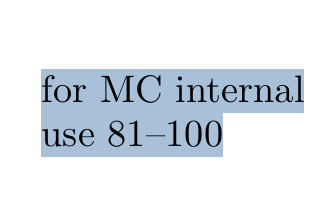


In [10]:
weird_particles = []

count = 0
for event, index, status, pileup, PID in unknown_particles:
    if not(index == 0 and status == 11 and pileup == 0):
        weird_particles.append((event, index, status, pileup, PID))
        count += 1
    
count 

371

- list of weird particles that have no PID

In [12]:
unknown_PIDs = dict()

for even, index, status, pileup, PID in weird_particles:
    unknown_PIDs[PID] = unknown_PIDs.get(PID, 0) + 1

unknown_PIDs

{9942033: 40,
 9941003: 21,
 9950003: 11,
 9942103: 24,
 9940003: 69,
 14122: 5,
 9942003: 70,
 9940103: 55,
 9940011: 26,
 9940023: 11,
 9940005: 20,
 9941103: 6,
 4124: 2,
 9950011: 5,
 9951203: 6}

- cant find any of these PIDs in https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf
- maybe outdated? idk

In [30]:
sorted_keys = []

for key in unknown_PIDs.keys():
    sorted_keys.append((key, unknown_PIDs[key]))

sorted_keys = sorted(sorted_keys, key = lambda x: x[0])
sorted_keys = list(map(lambda x: (str(x[0]), x[1]), sorted_keys))

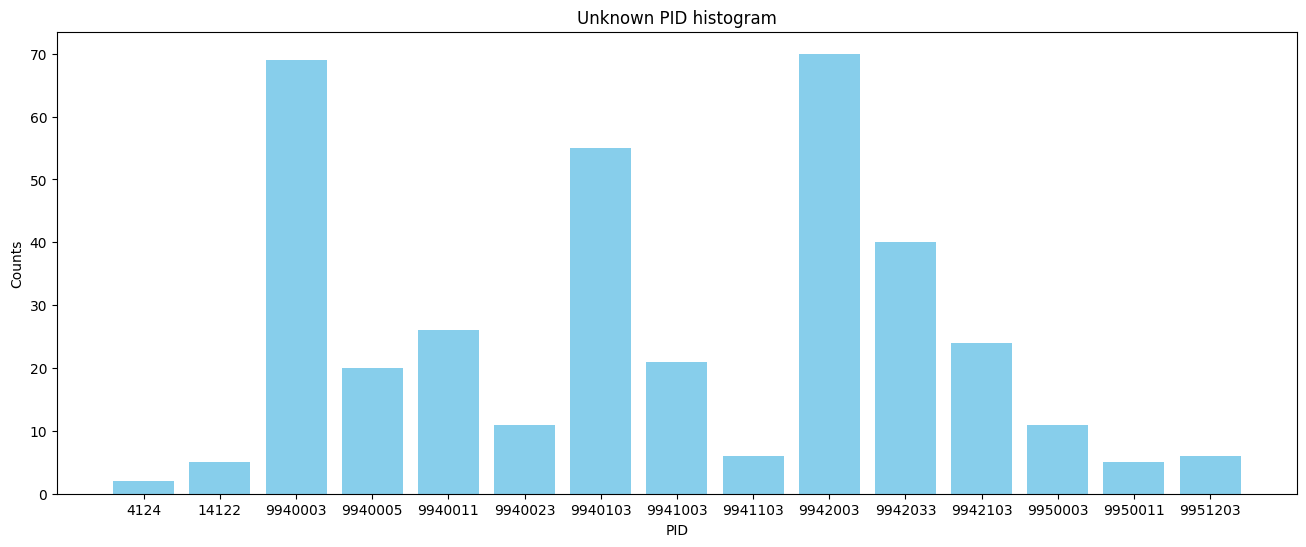

In [34]:
# Extracting keys and values
categories = list(map(lambda x: x[0], sorted_keys))
values = list(map(lambda x: x[1], sorted_keys))

# Creating the histogram
plt.figure(figsize=(16, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('PID')
plt.ylabel('Counts')
plt.title('Unknown PID histogram')
plt.show()

# Check pileup

In [19]:
pileup_particles = []

for event in range(0, 50000):
    for index, partice_IsPU in enumerate(isPU[event]):
        if partice_IsPU != 0:
            pileup_particles.append(tuple([event, index, isPU[event][index]]))

In [20]:
len(pileup_particles)

0

- No pileup particles in this dataset....?

# checking statuses

In [14]:
count_statuses = dict()

for event in range(0, 50000):
    for index, status in enumerate(statuses[event]):
        count_statuses[status] = count_statuses.get(status, 0) + 1

count_statuses

{11: 50000,
 4: 100000,
 21: 100000,
 23: 100000,
 31: 814026,
 33: 814026,
 42: 1047502,
 41: 1047502,
 44: 5033899,
 43: 1047502,
 51: 7793726,
 52: 3391377,
 53: 505486,
 61: 914026,
 62: 5855080,
 63: 270868,
 74: 6445,
 73: 1485639,
 71: 4532693,
 1: 21205825,
 2: 10842805,
 72: 82315,
 91: 147}

- idk what these mean but sure?

In [26]:
sorted_keys = []

for key in count_statuses.keys():
    sorted_keys.append((key, count_statuses[key]))

sorted_keys = sorted(sorted_keys, key = lambda x: x[0])
sorted_keys = list(map(lambda x: (str(x[0]), x[1]), sorted_keys))

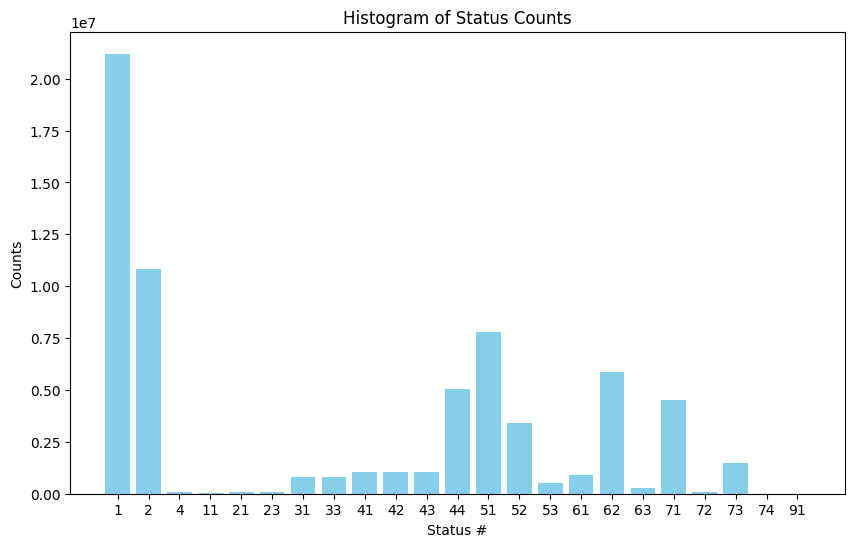

In [29]:
# Extracting keys and values
categories = list(map(lambda x: x[0], sorted_keys))
values = list(map(lambda x: x[1], sorted_keys))

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Status #')
plt.ylabel('Counts')
plt.title('Histogram of Status Counts')
plt.show()

# Jets

In [37]:
total = 0
for jet in jets['Jet.fUniqueID'].array(library='np'):
    total += len(jet)
print(total)


45642


In [42]:
jets_by_event = jets['Jet.Particles'].array(library='pd')
flavors = jets['Jet.Flavor'].array()
particles_PID_by_event = particles['Particle.PID'].array(library='pd')

for event in range(0, 20):
    all_jets = jets_by_event[event]
    particle_PID = particles_PID_by_event[event]
    flavor = flavors[event]
    
    print(f'Event #{event}')
    if len(all_jets) > 0:
        num = 1
        for jet, flavor in zip(all_jets, flavor):
            print(f'\tJet #{num}')
            constituents = jet['refs']
            print(f'Jet Particles: {constituents}')
            print(f'\tJet Flavor: {flavor}')
            print('\tParticles in Jet:')
            for particle in constituents:
                print('\t\t', get_particle(particle_PID[particle-1]))

            num += 1

# Count strave vs down jets

In [35]:
flavors = jets['Jet.Flavor'].array()
flavor_counts = dict()

for event in range(0, 50000):
    for flavor in flavors[event]:
        flavor_counts[flavor] = flavor_counts.get(flavor, 0) + 1
    
flavor_counts

{3: 30283, 0: 11351, 21: 2321, 1: 409, 2: 527, 4: 664, 5: 87}

In [37]:
sorted_keys = []

for key in flavor_counts.keys():
    sorted_keys.append((key, flavor_counts[key]))

sorted_keys = sorted(sorted_keys, key = lambda x: x[0])
sorted_keys = list(map(lambda x: (str(x[0]), x[1]), sorted_keys))

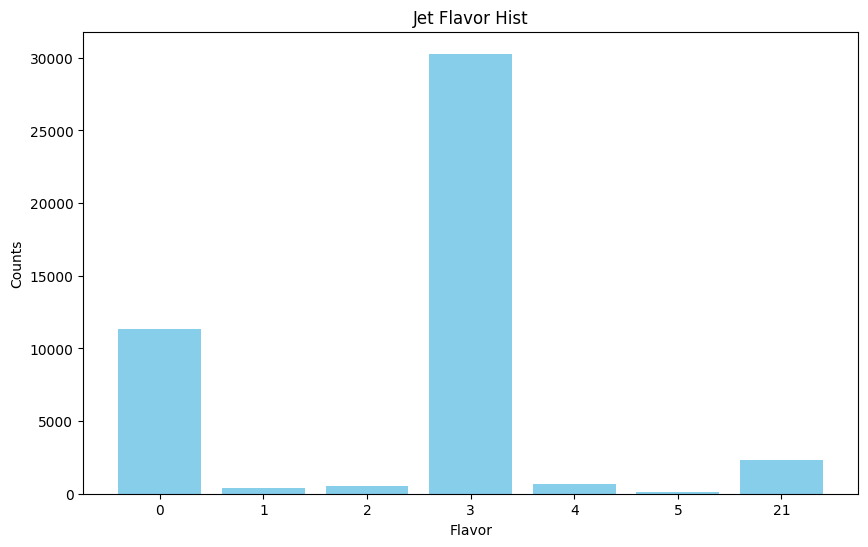

In [40]:
# Extracting keys and values
categories = list(map(lambda x: x[0], sorted_keys))
values = list(map(lambda x: x[1], sorted_keys))

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Flavor')
plt.ylabel('Counts')
plt.title('Jet Flavor Hist')
plt.show()

# Check the lifetime of all gluons
- expected lifetime is 0

In [42]:
particle_lifetimes = particles["Particle.T"].array()
particles_PIDs = particles["Particle.PID"].array()

isGluon = lambda PID: PID == 21

In [44]:
from tqdm import tqdm

In [51]:
gluon_dict = dict()

for event in tqdm(range(50000), desc="Processing"):
    gluon_dict[event] = []
    for index, PID in enumerate(particles_PIDs[event]):
        if PID == 21:
            gluon_dict[event].append((event, index))


Processing: 100%|██████████| 50000/50000 [04:54<00:00, 169.76it/s]


In [57]:
gluon_lifetime_counts = dict()


for event in tqdm(range(50000), desc="Processing"):
      gluons_in_event = gluon_dict.get(event, None)

      if gluons_in_event:
            lifetimes_in_event = particle_lifetimes[event]

            for index in gluons_in_event:
                  lifetime = lifetimes_in_event[index]
                  gluon_lifetime_counts[lifetime] = gluon_lifetime_counts.get(lifetime, 0) + 1
                  
                              
gluon_lifetime_counts

Processing: 100%|██████████| 50000/50000 [19:23<00:00, 42.98it/s] 


{0.0: 28471841}

- awesome all have 0 time

# Check Tau particle lifetimes

In [58]:
tau_dict = dict()

for event in tqdm(range(50000), desc="Processing"):
    tau_dict[event] = []
    for index, PID in enumerate(particles_PIDs[event]):
        if PID == 15: # Tau particle, not counting anti-taus
            tau_dict[event].append(index)

Processing: 100%|██████████| 50000/50000 [05:45<00:00, 144.90it/s]


In [81]:
tau_lifetime_counts = dict()
total = 0

for event in tqdm(range(50000), desc="Processing"):
      taus_in_event = tau_dict.get(event, None)

      if taus_in_event:
            lifetimes_in_event = particle_lifetimes[event]

            for index in taus_in_event:
                  total += 1
                  lifetime = lifetimes_in_event[index]
                  tau_lifetime_counts[lifetime] = tau_lifetime_counts.get(lifetime, 0) + 1
                                            
total

Processing: 100%|██████████| 50000/50000 [00:00<00:00, 735342.26it/s]


237

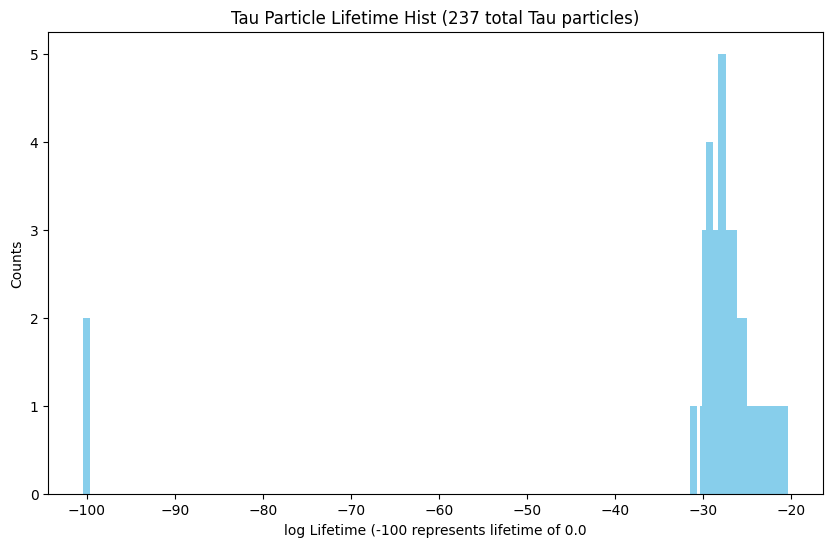

In [83]:
sorted_keys = []

for key in tau_lifetime_counts.keys():
    sorted_keys.append((key, tau_lifetime_counts[key]))

sorted_keys = sorted(sorted_keys, key = lambda x: x[0])
sorted_keys = list(map(lambda x: (-100, x[1]) if x[0] == 0 else (np.log(x[0]), x[1]), sorted_keys))

# Extracting keys and values
categories = list(map(lambda x: x[0], sorted_keys))
values = list(map(lambda x: x[1], sorted_keys))

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('log Lifetime (-100 represents lifetime of 0.0')
plt.ylabel('Counts')
plt.title('Tau Particle Lifetime Hist (237 total Tau particles)')
plt.show()

# D0 and DZ vs X, Y, Z particle components

In [84]:
particles.keys()

['Particle.fUniqueID',
 'Particle.fBits',
 'Particle.PID',
 'Particle.Status',
 'Particle.IsPU',
 'Particle.M1',
 'Particle.M2',
 'Particle.D1',
 'Particle.D2',
 'Particle.Charge',
 'Particle.Mass',
 'Particle.E',
 'Particle.Px',
 'Particle.Py',
 'Particle.Pz',
 'Particle.P',
 'Particle.PT',
 'Particle.Eta',
 'Particle.Phi',
 'Particle.Rapidity',
 'Particle.CtgTheta',
 'Particle.D0',
 'Particle.DZ',
 'Particle.T',
 'Particle.X',
 'Particle.Y',
 'Particle.Z']

In [98]:
d0_array = particles['Particle.D0'].array(library='np')
dz_array = particles['Particle.DZ'].array(library='np')

x_array = particles['Particle.X'].array(library='np')
y_array = particles['Particle.Y'].array(library='np')
z_array = particles['Particle.Z'].array(library='np')

statuses = particles['Particle.Status'].array(library='np')

In [90]:
import math
def compute_radial_distance(d0, dz):
    """
    Compute the radial distance from the origin given D0 and DZ.

    Parameters:
    d0 (float): Transverse distance from the origin.
    dz (float): Longitudinal distance from the origin.

    Returns:
    float: Radial distance from the origin.
    """
    radial_distance = math.sqrt(d0**2 + dz**2)
    return radial_distance

def compute_radial_distance_xyz(x, y, z):
    """
    Compute the radial distance from the origin given X, Y, and Z coordinates.

    Parameters:
    x (float): X coordinate.
    y (float): Y coordinate.
    z (float): Z coordinate.

    Returns:
    float: Radial distance from the origin.
    """
    radial_distance = math.sqrt(x**2 + y**2 + z**2)
    return radial_distance

In [117]:
epsilon = 1e-10
status_of_differing_particles_count = dict()

negative_count = dict()
positive_count = dict()

for event in tqdm(range(50000), desc="Processing"):
    for index, (d0, dz, x, y, z, status) in enumerate(zip(d0_array[event], dz_array[event], x_array[event], y_array[event], z_array[event], statuses[event])):

        d_r = compute_radial_distance(d0, dz)
        d_xyz = compute_radial_distance_xyz(x, y, z)
        diff = d_r - d_xyz

        if abs(diff) > epsilon:

            if diff > 0: # d_r bigger than d_xyz 
                positive_count[status] = positive_count.get(status, 0) + 1
                
            else: # d_xyz bigger
                negative_count[status] = negative_count.get(status, 0) + 1

            status_of_differing_particles_count[status] = status_of_differing_particles_count.get(status, 0) + 1

Processing: 100%|██████████| 50000/50000 [22:17<00:00, 37.39it/s] 


{}

In [119]:
status_of_differing_particles_count, negative_count, positive_count

({1: 3149111, 2: 576631}, {1: 3048557, 2: 576631}, {1: 100554})

- differences between $r_0$ calculations for D0, DZ vs X, Y, Z calculations happen on status 1/2 particles
- d_r bigger only in status 1 particles 
- d_xyz bigger almost 6x as much for status 1 vs. status 2

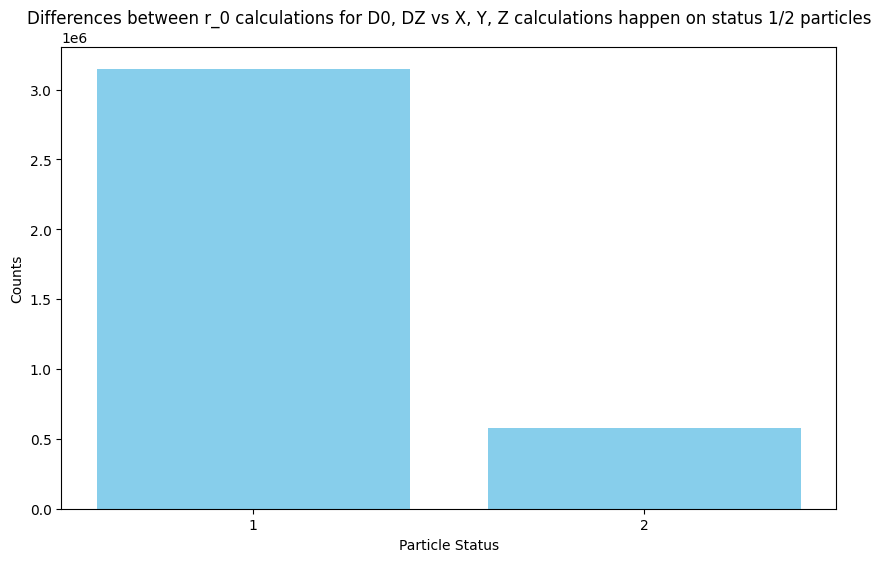

In [125]:
# Extracting keys and values
categories = list(map(lambda x: str(x), negative_count.keys()))
values = status_of_differing_particles_count.values()

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Particle Status')
plt.ylabel('Counts')
plt.title('Differences between r_0 calculations for D0, DZ vs X, Y, Z calculations happen on status 1/2 particles')
plt.show()

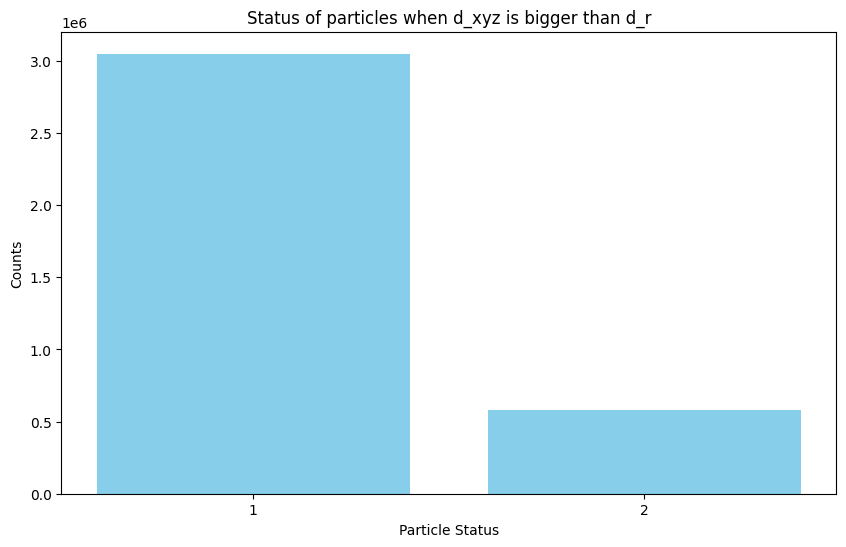

In [124]:
# Extracting keys and values
categories = list(map(lambda x: str(x), negative_count.keys()))
values = negative_count.values()

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Particle Status')
plt.ylabel('Counts')
plt.title('Status of particles when d_xyz is bigger than d_r')
plt.show()

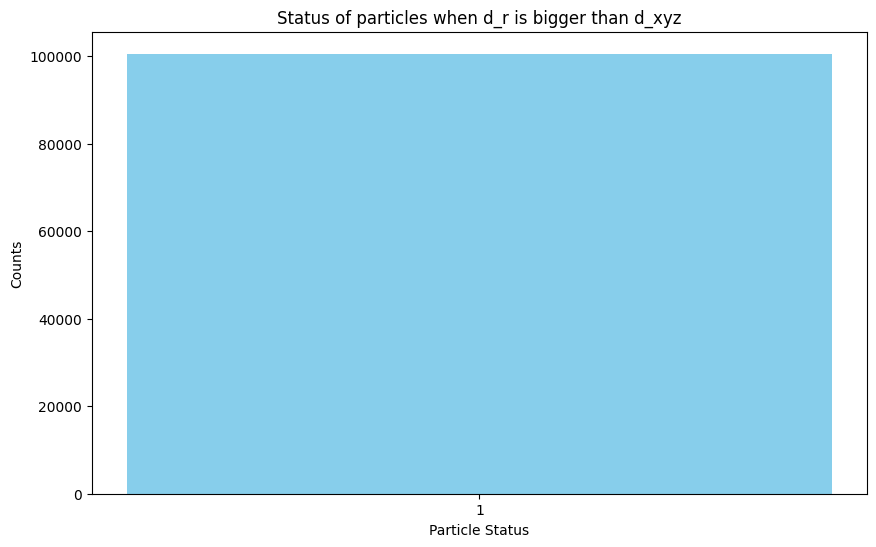

In [127]:
# Extracting keys and values
categories = list(map(lambda x: str(x), positive_count.keys()))
values = positive_count.values()

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Particle Status')
plt.ylabel('Counts')
plt.title('Status of particles when d_r is bigger than d_xyz')
plt.show()